In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

In [17]:
data1 = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [20]:
data = data1[['sepal length (cm)', 'sepal width (cm)']]

In [22]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)


# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)



LinearDiscriminantAnalysis()

In [23]:
lda.predict(X_test)

array([1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0,
       1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1])

In [29]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

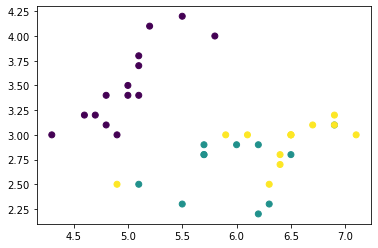

In [38]:
# Визуализируйте предсказания для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.show()

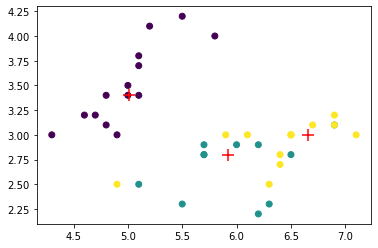

In [48]:
# Центры классов
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='+')

### Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию



In [49]:
from sklearn.cluster import KMeans

In [54]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

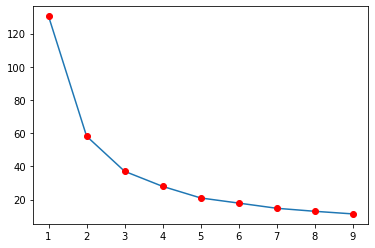

In [55]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Оптимальное число кластеров - 3